# Lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline

## Lissajous curve

$$ x = a_1 \cos{(\omega_1 t + \phi)} $$

$$ y = a_2 \sin{\omega_2 t} $$

In [2]:
def lissajous_curve(t, a1, a2, w1, w2, f):
    x = a1 * np.cos(w1 * t + f)
    y = a2 * np.sin(w2 * t)
    return x,y

def plot_lissajous_curve(a1, a2, w1, w2, f):
    t = np.linspace(0,10, 1000)
    x, y = lissajous_curve(t, a1, a2, w1, w2, f)
    
    plt.plot(x, y)
    plt.grid()

In [3]:
w_range = (0, 5, 0.1)
interact(plot_lissajous_curve, a1=1, a2=1, w1=w_range, w2=w_range, f=(-np.pi/2, np.pi/2, np.pi/6))

interactive(children=(IntSlider(value=1, description='a1', max=3, min=-1), IntSlider(value=1, description='a2'…

<function __main__.plot_lissajous_curve(a1, a2, w1, w2, f)>

## Chebyshev polynomials

$$ T_n(x) = \cos{(n \arccos{x})} $$

In [4]:
def chebyshev(x, n):
    return np.cos(n * np.arccos(x))    

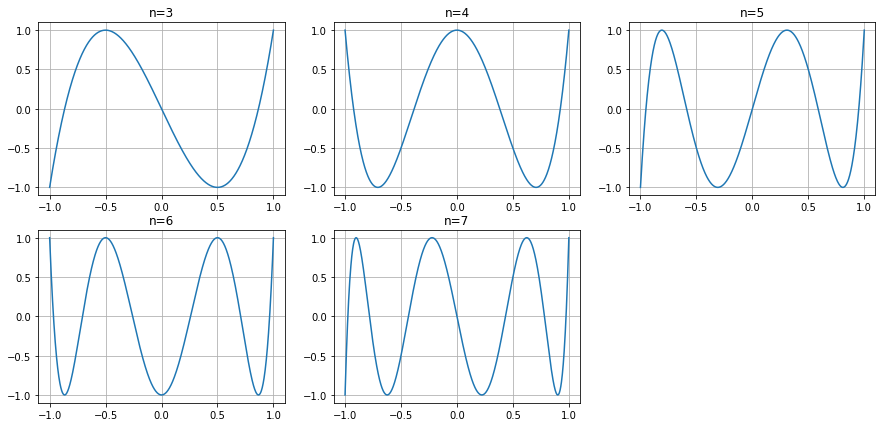

In [5]:
x = np.linspace(-1, 1, 1000)

plt.figure(figsize=(15,7))

for i in range(1,6):
    plt.subplot(2,3,i)
    n = i +2
    plt.plot(x, chebyshev(x, n))
    plt.grid()
    plt.title(f"n={n}")

## Hodograph of Mikhailov

Let be $d(p)$ is characteristic polynomial of differential equation:
$$ d(p) = a_n p^n + \dots + a_1 p^1 + a_0 $$

Replace $p$ by $i\omega$:
$$ p \rightarrow i \omega $$

Hodograf of Mikhailov:
$$ x = \operatorname{Re}d(jw) $$
$$ y = \operatorname{Im}d(jw) $$

In [6]:
def d5(p):    
    return p**99 + p**88 + p**77 + p**5 + p + 4

def mikhailov(polynom, w):
    jw = 1j * w;
    d = polynom(jw)
    return d.real, d.imag

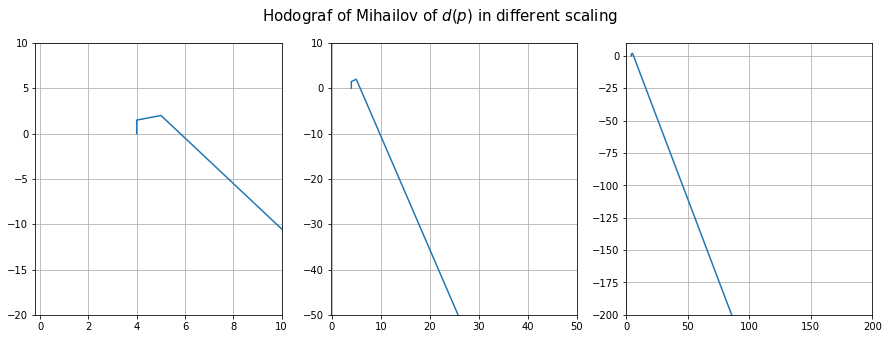

In [7]:
w = np.linspace(0, 1000, 10000)
x, y = mikhailov(d5, w)

def plot_mikhailov(x, y, xlim, ylim):
    plt.plot(x,y)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.grid()

plt.figure(figsize=(15,5))
plt.suptitle(r"Hodograf of Mihailov of $d(p)$ in different scaling", fontsize=15)

plt.subplot(1,3,1)
plot_mikhailov(x, y, (-0.2, 10), (-20,10))
    
plt.subplot(1,3,2)
plot_mikhailov(x, y, (-0.2, 50), (-50,10))

plt.subplot(1,3,3)
plot_mikhailov(x, y, (-0.2, 200), (-200,10))